# Taller 2

<h2>Cree un notebook de python donde implemente los siguientes algoritmos para el problema de multiplicación de matrices cuadradas de tamaño nxn A*B = C:</h2>

<h3>1. Implemente un algoritmo de multiplicación de matrices en tiempo O(n^3) que calcule cada elemento de la matriz C como c_{ij} = \sum_{k=1}^n a_{ik}*b_{kj}</h3>

In [83]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

In [41]:
#algoritmo analisado de: https://programacion-innata.blogspot.com.co/2013/06/producto-de-matrices-en-c.html
def matrizProduct(A,B):
    rowA = len(A)
    colA = len(A[1,:])
    rowB = len(B)
    colB = len(B[1,:])
    if colA == rowB:
        C = np.zeros((rowA,colB))
        #it can multiply
        for i in range(rowA):      
            for j in range(colB):             
                for k in range(colA):
                    C[i,j]+=A[i,k]*B[k,j]  
        return C
    return "Matrix A's number of cols is diferent than Matrix B's number of rows"

In [68]:
A = np.arange(12).reshape(4,3)
B = np.arange(6).reshape(3,2)

print "Matrix A"
print A
print ""
print "Matrix B"
print B
print ""
print "Matrix A*B"
print matrizProduct(A,B)

Matrix A
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

Matrix B
[[0 1]
 [2 3]
 [4 5]]

Matrix A*B
[[ 10.  13.]
 [ 28.  40.]
 [ 46.  67.]
 [ 64.  94.]]


<h3>2. Implemente un algoritmo de multiplicación de matrices basado en una estrategía de multiplicación de matrices en tiempo O(n^3) donde cada matriz es dividida en 4 partes iguales.</h3>

In [60]:
def simpleProduct(A,B):
    C = np.empty((2,2))
    #a 0 0   b 0 1
    #c 1 0   d 1 1
    
    #e 0 0   f 0 1
    #g 1 0   h 1 1
    
    #r = a*e + b*g
    C[0,0] = A[0,0]*B[0,0] + A[0,1]*B[1,0]
    #s = a*f + b*h
    C[0,1] = A[0,0]*B[0,1] + A[0,1]*B[1,1]
    #t = c*e + d*g
    C[1,0] = A[1,0]*B[0,0] + A[1,1]*B[1,0]
    #u = c*f + d*h
    C[1,1] = A[1,0]*B[0,1] + A[1,1]*B[1,1]
    
    return C

In [17]:
def reSizeMat( M, maxS):
    if maxS%2 != 0:
        maxS = maxS+1
    C = np.zeros((maxS,maxS))
    for r in range(len(M)):
        for c in range(len(M[0,:])):
            C[r,c] = M[r,c]
    return C

In [18]:
def subMat( M, cooSize):
    x = cooSize[1]-cooSize[0]
    y = cooSize[3]-cooSize[2]
    C = np.empty((x,y))
    for i in range( cooSize[0], cooSize[1] ):
        for j in range( cooSize[2], cooSize[3] ):
            C[i%x,j%y] = M[i,j]
    return C

In [25]:
def supraMat( C, M, cooSize ):
    x = cooSize[1]-cooSize[0]
    y = cooSize[3]-cooSize[2]
    for i in range( cooSize[0], cooSize[1] ):
        for j in range( cooSize[2], cooSize[3] ):
            C[i,j] = M[i%x,j%y]
            
    return C

In [61]:
def divEtImperaMatP( A, B ):
    #Si la matriz es impar convertirla en matrices cuadradas pares del mismo tamaño
    sizes = [len(A),len(A[0,:]),len(B),len(B[0,:])]
    A = reSizeMat( A, max(sizes))
    B = reSizeMat( B, max(sizes))
    #si la matriz es tam 2
    if len(A) == 2:
        return simpleProduct(A,B)
    else:
        #Repartir las 4 submatrices
        a = subMat( A, [0,len(A)/2,0,len(A)/2] )
        b = subMat( A, [0,len(A)/2,len(A)/2,len(A)] )
        c = subMat( A, [len(A)/2,len(A),0,len(A)/2] )
        d = subMat( A, [len(A)/2,len(A),len(A)/2,len(A)] )

        e = subMat( B, [0,len(B)/2,0,len(B)/2] )
        f = subMat( B, [0,len(B)/2,len(B)/2,len(B)] )
        g = subMat( B, [len(B)/2,len(B),0,len(B)/2] )
        h = subMat( B, [len(B)/2,len(B),len(B)/2,len(B)] )

        #Multiplicar y sumar matrices
        #r = a*e + b*g
        r = divEtImperaMatP(a,e) + divEtImperaMatP(b,g)
        #s = a*f + b*h
        s = divEtImperaMatP(a,f) + divEtImperaMatP(b,h)
        #t = c*e + d*g
        t = divEtImperaMatP(c,e) + divEtImperaMatP(d,g)
        #u = c*f + d*h
        u = divEtImperaMatP(c,f) + divEtImperaMatP(d,h)
        #concatenar r s t u asia C
        C = np.zeros_like(A)
        C = supraMat( C, r, [0,len(A)/2,0,len(A)/2] )
        C = supraMat( C, s, [0,len(A)/2,len(A)/2,len(A)] )
        C = supraMat( C, t, [len(A)/2,len(A),0,len(A)/2] )
        C = supraMat( C, u, [len(B)/2,len(B),len(B)/2,len(B)] )
        return C

In [65]:
def martrixProductDV( A, B ):
    C = divEtImperaMatP( A, B )
    rowA = len(A)
    colB = len(B[1,:])
    D = np.empty((rowA,colB))
    for i in range(rowA):
        for j in range(colB):
            D[i,j] = C[i,j]
    return D

In [67]:
A = np.arange(12).reshape(4,3)
B = np.arange(6).reshape(3,2)

print "Matrix A"
print A
print ""
print "Matrix B"
print B
print ""
print "Matrix A*B"
print martrixProductDV( A, B )

Matrix A
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

Matrix B
[[0 1]
 [2 3]
 [4 5]]

Matrix A*B
[[ 10.  13.]
 [ 28.  40.]
 [ 46.  67.]
 [ 64.  94.]]


<h3>3. Implemente el algoritmo de strassen.</h3>

In [70]:
def strassensIdea(A,B):
    C = np.empty((2,2))        
    #a 0 0   b 0 1
    #c 1 0   d 1 1
    
    #e 0 0   f 0 1
    #g 1 0   h 1 1
    
    a = A[0,0]
    b = A[0,1]
    c = A[1,0]
    d = A[1,1]

    e = B[0,0]
    f = B[0,1]
    g = B[1,0]
    h = B[1,1]    
    
    P1 = a*(f-h)
    P2 = (a+b)*h
    P3 = (c+d)*e
    P4 = d*(g-e)    
    P5 = (a+d)*(e+h)   
    P6 = (b-d)*(g+h)    
    P7 = (a-c)*(e+f)       
        
    #r = P5 + P4 - P2 + P6
    C[0,0] = P5 + P4 - P2 + P6
    #s = P1 + P2
    C[0,1]  = P1 + P2
    #t = P3 + P4
    C[1,0] = P3 + P4
    #u = P5 + P1 - P3 - P7
    C[1,1] = P5 + P1 - P3 - P7    
    return C

In [69]:
def strassenMatP( A, B ):
    #Si la matriz es impar convertirla en matrices cuadradas pares del mismo tamaño
    sizes = [len(A),len(A[0,:]),len(B),len(B[0,:])]
    A = reSizeMat( A, max(sizes))
    B = reSizeMat( B, max(sizes))
    #si la matriz es tam 2
    if len(A) == 2:
        return strassensIdea(A,B)
    else:
        #Repartir las 4 submatrices
        a = subMat( A, [0,len(A)/2,0,len(A)/2] )
        b = subMat( A, [0,len(A)/2,len(A)/2,len(A)] )
        c = subMat( A, [len(A)/2,len(A),0,len(A)/2] )
        d = subMat( A, [len(A)/2,len(A),len(A)/2,len(A)] )

        e = subMat( B, [0,len(B)/2,0,len(B)/2] )
        f = subMat( B, [0,len(B)/2,len(B)/2,len(B)] )
        g = subMat( B, [len(B)/2,len(B),0,len(B)/2] )
        h = subMat( B, [len(B)/2,len(B),len(B)/2,len(B)] )

        #Metodo Strassen
        #P1 = a*(f-h)
        P1 = strassenMatP( a, f-h )
        #P2 = (a+b)*h
        P2 = strassenMatP( a+b, h )
        #P3 = (c+d)*e
        P3 = strassenMatP( c+d, e )
        #P4 = d*(g-e)
        P4 = strassenMatP( d, g-e )
        #P5 = (a+d)*(e+h)
        P5 = strassenMatP( a+d, e+h )
        #P6 = (b-d)*(g+h)
        P6 = strassenMatP( b-d, g+h )
        #P7 = (a-c)*(e+f)
        P7 = strassenMatP( a-c, e+f )        
        
        #r = P5 + P4 - P2 + P6
        r = P5 + P4 - P2 + P6
        #s = P1 + P2
        s = P1 + P2
        #t = P3 + P4
        t = P3 + P4
        #u = P5 + P1 - P3 - P7
        u = P5 + P1 - P3 - P7
        
        #concatenar r s t u asia C
        C = np.zeros_like(A)
        C = supraMat( C, r, [0,len(A)/2,0,len(A)/2] )
        C = supraMat( C, s, [0,len(A)/2,len(A)/2,len(A)] )
        C = supraMat( C, t, [len(A)/2,len(A),0,len(A)/2] )
        C = supraMat( C, u, [len(B)/2,len(B),len(B)/2,len(B)] )
        return C
    

In [71]:
def strassenMethod( A, B ):
    C = strassenMatP( A, B )
    rowA = len(A)
    colB = len(B[1,:])
    D = np.empty((rowA,colB))
    for i in range(rowA):
        for j in range(colB):
            D[i,j] = C[i,j]
    return D

In [72]:
A = np.arange(12).reshape(4,3)
B = np.arange(6).reshape(3,2)

print "Matrix A"
print A
print ""
print "Matrix B"
print B
print ""
print "Matrix A*B"
print strassenMethod( A, B )

Matrix A
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

Matrix B
[[0 1]
 [2 3]
 [4 5]]

Matrix A*B
[[ 10.  13.]
 [ 28.  40.]
 [ 46.  67.]
 [ 64.  94.]]


<h3>4. Para cada uno de los algoritmos incorpore un objeto que cuente el número de operaciones.</h3>
<ul>
 <li>Pruebe cada uno de los algoritmos con matrices de valores aleatorios con tamaños de n que varien linealmente desde 2 hasta 100 y registre la cantidad de operaciones que toma calcular C.</li>
 <li>En una sola gráfica compare el tiempo de ejecución de los tres algoritmos de acuerdo a la cantidad de operaciones.</li>
</ul>

In [73]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps

<h5>Matriz Producto</h5>

In [74]:
#algoritmo analisado de: https://programacion-innata.blogspot.com.co/2013/06/producto-de-matrices-en-c.html
def aMatrizProduct(A,B,acct):
    rowA = len(A); acct.count()
    colA = len(A[1,:]); acct.count()
    rowB = len(B); acct.count()
    colB = len(B[1,:]); acct.count()
    acct.count()
    if colA == rowB:
        acct.count()
        C = np.zeros((rowA,colB)); acct.count()
        #it can multiply
        acct.count()
        for i in range(rowA):
            acct.count()
            for j in range(colB):
                acct.count()
                for k in range(colA):
                    acct.count()
                    C[i,j]+=A[i,k]*B[k,j]; acct.count()
        acct.count()
        return C
    acct.count()
    return "Matrix A's number of cols is diferent than Matrix B's number of rows"

In [97]:
def analysisPM(n):
    results = []
    acct = Counter()
    for i in range(2,n+2):
        acct.reset()
        A = np.arange(i*i).reshape(i,i)
        B = np.arange(i*i).reshape(i,i)
        aMatrizProduct(A,B,acct)
        results.append(acct.steps)
    return results

<h5>Matriz Producto Divide Et Impera</h5>

In [105]:
def simpleProductA(A,B,acct):
    C = np.empty((2,2)); acct.count()
    #a 0 0   b 0 1
    #c 1 0   d 1 1
    
    #e 0 0   f 0 1
    #g 1 0   h 1 1
    
    #r = a*e + b*g
    C[0,0] = A[0,0]*B[0,0] + A[0,1]*B[1,0]; acct.count()
    #s = a*f + b*h
    C[0,1] = A[0,0]*B[0,1] + A[0,1]*B[1,1]; acct.count()
    #t = c*e + d*g
    C[1,0] = A[1,0]*B[0,0] + A[1,1]*B[1,0]; acct.count()
    #u = c*f + d*h
    C[1,1] = A[1,0]*B[0,1] + A[1,1]*B[1,1]; acct.count()
    
    acct.count()
    return C

In [106]:
def reSizeMatA( M, maxS,acct):
    acct.count()
    if maxS%2 != 0:
        acct.count()
        maxS = maxS+1; acct.count()
    C = np.zeros((maxS,maxS)); acct.count()
    acct.count()
    for r in range(len(M)):
        acct.count()
        for c in range(len(M[0,:])):
            acct.count()
            C[r,c] = M[r,c]; acct.count()
    acct.count()
    return C

In [107]:
def subMatA( M, cooSize,acct):
    x = cooSize[1]-cooSize[0]; acct.count()
    y = cooSize[3]-cooSize[2]; acct.count()
    C = np.empty((x,y)); acct.count()
    acct.count()
    for i in range( cooSize[0], cooSize[1] ):
        acct.count()
        for j in range( cooSize[2], cooSize[3] ):
            acct.count()
            C[i%x,j%y] = M[i,j]; acct.count()
    acct.count()
    return C

In [108]:
def supraMatA( C, M, cooSize ,acct):
    x = cooSize[1]-cooSize[0]; acct.count()
    y = cooSize[3]-cooSize[2]; acct.count()
    acct.count()
    for i in range( cooSize[0], cooSize[1] ):
        acct.count()
        for j in range( cooSize[2], cooSize[3] ):
            acct.count()
            C[i,j] = M[i%x,j%y]; acct.count()
    acct.count()        
    return C

In [109]:
def divEtImperaMatP_A( A, B, acct ):
    #Si la matriz es impar convertirla en matrices cuadradas pares del mismo tamaño
    sizes = [len(A),len(A[0,:]),len(B),len(B[0,:])]; acct.count()
    A = reSizeMatA( A, max(sizes),acct); acct.count()
    B = reSizeMatA( B, max(sizes),acct); acct.count()
    #si la matriz es tam 2
    acct.count()
    if len(A) == 2:
        acct.count()
        acct.count()
        return simpleProductA(A,B,acct)
    else:
        #Repartir las 4 submatrices
        a = subMatA( A, [0,len(A)/2,0,len(A)/2],acct ); acct.count()
        b = subMatA( A, [0,len(A)/2,len(A)/2,len(A)],acct ); acct.count()
        c = subMatA( A, [len(A)/2,len(A),0,len(A)/2],acct ); acct.count()
        d = subMatA( A, [len(A)/2,len(A),len(A)/2,len(A)],acct ); acct.count()

        e = subMatA( B, [0,len(B)/2,0,len(B)/2],acct ); acct.count()
        f = subMatA( B, [0,len(B)/2,len(B)/2,len(B)],acct); acct.count()
        g = subMatA( B, [len(B)/2,len(B),0,len(B)/2],acct ); acct.count()
        h = subMatA( B, [len(B)/2,len(B),len(B)/2,len(B)],acct ); acct.count()

        #Multiplicar y sumar matrices
        #r = a*e + b*g
        r = divEtImperaMatP_A(a,e,acct) + divEtImperaMatP_A(b,g,acct); acct.count()
        #s = a*f + b*h
        s = divEtImperaMatP_A(a,f,acct) + divEtImperaMatP_A(b,h,acct); acct.count()
        #t = c*e + d*g
        t = divEtImperaMatP_A(c,e,acct) + divEtImperaMatP_A(d,g,acct); acct.count()
        #u = c*f + d*h
        u = divEtImperaMatP_A(c,f,acct) + divEtImperaMatP_A(d,h,acct); acct.count()
        #concatenar r s t u asia C
        C = np.zeros_like(A); acct.count()
        C = supraMatA( C, r, [0,len(A)/2,0,len(A)/2],acct ); acct.count()
        C = supraMatA( C, s, [0,len(A)/2,len(A)/2,len(A)],acct ); acct.count()
        C = supraMatA( C, t, [len(A)/2,len(A),0,len(A)/2],acct ); acct.count()
        C = supraMatA( C, u, [len(B)/2,len(B),len(B)/2,len(B)],acct ); acct.count()
        acct.count()
        return C

In [110]:
def martrixProductDV_A( A, B, acct ):
    C = divEtImperaMatP_A( A, B, acct )
    rowA = len(A); acct.count()
    colB = len(B[1,:]); acct.count()
    D = np.empty((rowA,colB)); acct.count()
    acct.count()
    for i in range(rowA):
        acct.count()
        for j in range(colB):
            acct.count()
            D[i,j] = C[i,j]; acct.count()
    acct.count()
    return D

In [114]:
def analysisPM_DV(n):
    results = []
    acct = Counter()
    for i in range(2,n+2):
        acct.reset()
        A = np.arange(i*i).reshape(i,i)
        B = np.arange(i*i).reshape(i,i)
        martrixProductDV_A(A,B,acct)
        results.append(acct.steps)
    return results

In [115]:
print analysisPM_DV(10)

[55, 598, 639, 5088, 5153, 5626, 5715, 41492, 41605, 42350]


<h5>Matriz Producto Strassen</h5>

In [121]:
def strassensIdeaA(A,B, acct):
    C = np.empty((2,2)); acct.count()        
    #a 0 0   b 0 1
    #c 1 0   d 1 1
    
    #e 0 0   f 0 1
    #g 1 0   h 1 1
    
    a = A[0,0]; acct.count() 
    b = A[0,1]; acct.count() 
    c = A[1,0]; acct.count() 
    d = A[1,1]; acct.count() 

    e = B[0,0]; acct.count()
    f = B[0,1]; acct.count()
    g = B[1,0]; acct.count()
    h = B[1,1]; acct.count()    
    
    P1 = a*(f-h); acct.count()
    P2 = (a+b)*h; acct.count()
    P3 = (c+d)*e; acct.count()
    P4 = d*(g-e); acct.count()    
    P5 = (a+d)*(e+h); acct.count()   
    P6 = (b-d)*(g+h); acct.count()    
    P7 = (a-c)*(e+f); acct.count()       
        
    #r = P5 + P4 - P2 + P6
    C[0,0] = P5 + P4 - P2 + P6; acct.count()
    #s = P1 + P2
    C[0,1]  = P1 + P2; acct.count()
    #t = P3 + P4
    C[1,0] = P3 + P4; acct.count()
    #u = P5 + P1 - P3 - P7
    C[1,1] = P5 + P1 - P3 - P7; acct.count()
    
    acct.count()
    return C

In [122]:
def strassenMatP_A( A, B, acct ):
    #Si la matriz es impar convertirla en matrices cuadradas pares del mismo tamaño
    sizes = [len(A),len(A[0,:]),len(B),len(B[0,:])]; acct.count()
    A = reSizeMatA( A, max(sizes), acct); acct.count()
    B = reSizeMatA( B, max(sizes), acct); acct.count()
    #si la matriz es tam 2
    acct.count()
    if len(A) == 2:
        acct.count()
        return strassensIdeaA(A,B, acct); acct.count()
    else:
        acct.count()
        #Repartir las 4 submatrices
        a = subMatA( A, [0,len(A)/2,0,len(A)/2], acct ); acct.count()
        b = subMatA( A, [0,len(A)/2,len(A)/2,len(A)], acct ); acct.count()
        c = subMatA( A, [len(A)/2,len(A),0,len(A)/2], acct ); acct.count()
        d = subMatA( A, [len(A)/2,len(A),len(A)/2,len(A)], acct ); acct.count()

        e = subMatA( B, [0,len(B)/2,0,len(B)/2], acct ); acct.count()
        f = subMatA( B, [0,len(B)/2,len(B)/2,len(B)], acct ); acct.count()
        g = subMatA( B, [len(B)/2,len(B),0,len(B)/2], acct ); acct.count()
        h = subMatA( B, [len(B)/2,len(B),len(B)/2,len(B)], acct ); acct.count()

        #Metodo Strassen
        #P1 = a*(f-h)
        P1 = strassenMatP_A( a, f-h, acct ); acct.count()
        #P2 = (a+b)*h
        P2 = strassenMatP_A( a+b, h, acct ); acct.count()
        #P3 = (c+d)*e
        P3 = strassenMatP_A( c+d, e, acct ); acct.count()
        #P4 = d*(g-e)
        P4 = strassenMatP_A( d, g-e, acct ); acct.count()
        #P5 = (a+d)*(e+h)
        P5 = strassenMatP_A( a+d, e+h, acct ); acct.count()
        #P6 = (b-d)*(g+h)
        P6 = strassenMatP_A( b-d, g+h, acct ); acct.count()
        #P7 = (a-c)*(e+f)
        P7 = strassenMatP_A( a-c, e+f, acct ); acct.count()     
        
        #r = P5 + P4 - P2 + P6
        r = P5 + P4 - P2 + P6; acct.count()
        #s = P1 + P2
        s = P1 + P2; acct.count()
        #t = P3 + P4
        t = P3 + P4; acct.count()
        #u = P5 + P1 - P3 - P7
        u = P5 + P1 - P3 - P7; acct.count()
        
        #concatenar r s t u asia C
        C = np.zeros_like(A); acct.count()
        C = supraMatA( C, r, [0,len(A)/2,0,len(A)/2],acct ); acct.count()
        C = supraMatA( C, s, [0,len(A)/2,len(A)/2,len(A)],acct ); acct.count()
        C = supraMatA( C, t, [len(A)/2,len(A),0,len(A)/2],acct ); acct.count()
        C = supraMatA( C, u, [len(B)/2,len(B),len(B)/2,len(B)],acct ); acct.count()
        acct.count()
        return C
    

In [123]:
def strassenMethod_A( A, B, acct ):
    C = strassenMatP_A( A, B, acct )
    rowA = len(A); acct.count()
    colB = len(B[1,:]); acct.count()
    D = np.empty((rowA,colB)); acct.count()
    acct.count()
    for i in range(rowA):
        acct.count()
        for j in range(colB):
            acct.count()
            D[i,j] = C[i,j]; acct.count()
    acct.count()
    return D

In [124]:
def analysisPM_MS(n):
    results = []
    acct = Counter()
    for i in range(2,n+2):
        acct.reset()
        A = np.arange(i*i).reshape(i,i)
        B = np.arange(i*i).reshape(i,i)
        strassenMethod_A(A,B,acct)
        results.append(acct.steps)
    return results

In [125]:
print analysisPM_MS(10)

[69, 664, 705, 4986, 5051, 5498, 5587, 35758, 35871, 36574]


<h5>Gráfica de los 3 tipos de producto de matriz</h5>

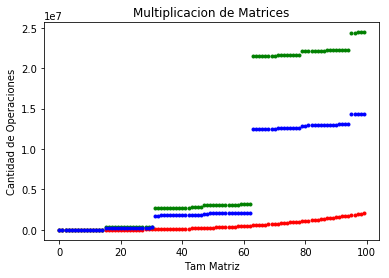

In [135]:
pl.clf()
pl.title('Multiplicacion de Matrices')
pl.xlabel('Tam Matriz')
pl.ylabel('Cantidad de Operaciones')
x = np.arange(100)
y1 = np.array(analysisPM(100))
y2 = np.array(analysisPM_DV(100))
y3 = np.array(analysisPM_MS(100))
pl.plot(x, y1, 'r.')
pl.plot(x, y2, 'g.')
pl.plot(x, y3, 'b.')

# Bibliografia
[1] A. Paz Valderrama, "divide y vencerás", YouTube, 2017. [Online]. Available: https://www.youtube.com/watch?v=63uo79Swd3Q&t=1675s. [Accessed: 19- Mar- 2017].